In [5]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [16]:
# Список файлов с результатами
json_files = [
    "obj_gender_deepvk.json",
    "sent_len_deepvk.json",
    "tree_depth_deepvk.json",
    "sent_len_deeppavlov.json",
    "tree_depth_deeppavlov.json",
    "obj_gender_deeppavlov.json"

]

In [14]:
def reduce_to_12_points(scores):
    """Привести любое число слоёв к 12 точкам, усреднив равномерные группы."""
    scores = np.array(scores)
    n = len(scores)
    if n == 12:
        return scores
    groups = np.array_split(np.arange(n), 12)  # делим индексы на 12 групп
    return np.array([scores[g].mean() for g in groups])

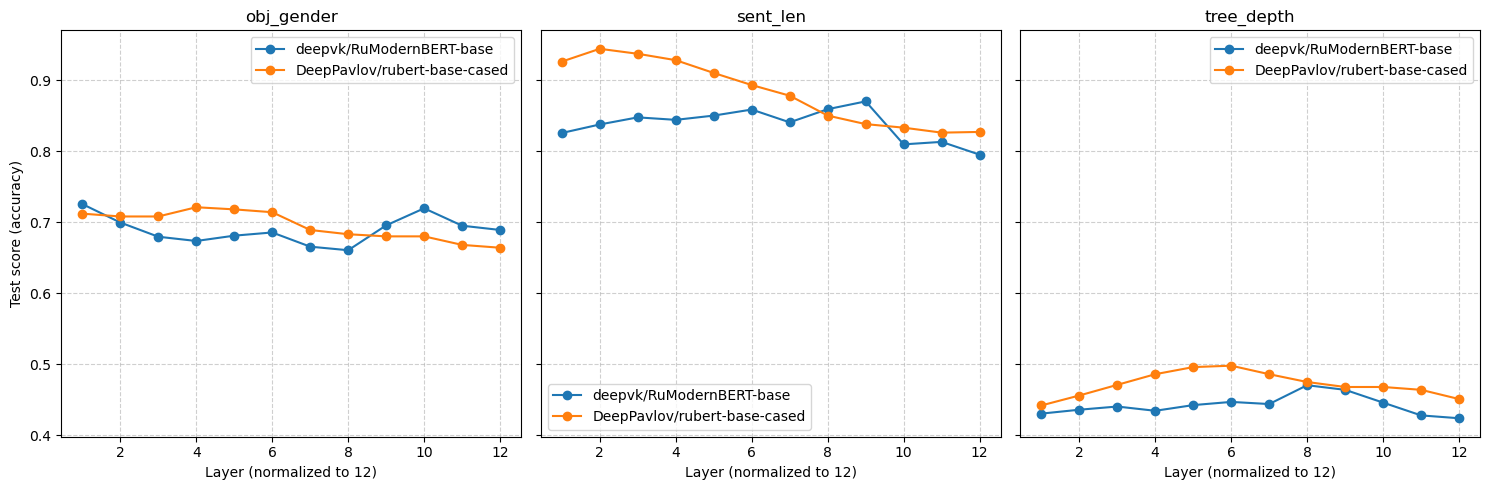

In [17]:
# Загружаем все результаты
all_results = {}
for file in json_files:
    with open(file, "r", encoding="utf-8") as f:
        results = json.load(f)

    task = results["probe_task"]
    model_name = results["model_name"]

    layers, scores = [], []
    for key, value in results.items():
        if key.isdigit():
            layers.append(int(key))
            scores.append(value["te_score"])

    # сортируем по номеру слоя
    layers, scores = zip(*sorted(zip(layers, scores)))

    # приводим к 12 точкам
    scores = reduce_to_12_points(scores)
    layers = list(range(1, 13))

    if task not in all_results:
        all_results[task] = {}
    all_results[task][model_name] = (layers, scores)

# Строим графики для каждой задачи
tasks = ["obj_gender", "sent_len", "tree_depth"]

fig, axes = plt.subplots(1, len(tasks), figsize=(15, 5), sharey=True)

for i, task in enumerate(tasks):
    ax = axes[i]
    for model_name, (layers, scores) in all_results[task].items():
        ax.plot(layers, scores, marker="o", label=model_name)
    ax.set_title(task)
    ax.set_xlabel("Layer (normalized to 12)")
    if i == 0:
        ax.set_ylabel("Test score (accuracy)")
    ax.grid(True, linestyle="--", alpha=0.6)
    ax.legend()

plt.tight_layout()
plt.show()